##   ***TOPIC*** **:-** **Exploring Loan Applicant characteristics and Risk Assessment**

//// Dataset from Kaggle.com ////


##### Importing Standard Libraries for Data Exploration,Data Wrangling and Machine Learning 

In [1]:
# Standard Library Imports 
import pandas as pd 
import numpy as np 
import wolta as ws
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Metrics selection
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score,auc,roc_curve,roc_auc_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report
# Cross validation 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.model_selection import StratifiedKFold



In [2]:
# Loading the dataset

data = pd.read_json("C:/Users/Hp/Documents/DATASET/Loan project/data/loan_approval_dataset.json")
# showing the dataset
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


#### Data Exploration.

* Checking for the information from the dataset,unique values.
* Checking how clean is the data, missing value, duplicates values.
* Checking for the lenth of the data, how the data is also distributed.
* ***Grouping to Numerical and categorical distributions***


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [4]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [5]:
data.duplicated().sum()

0

In [6]:
data.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [7]:
Numerical_var = [features for features in data.columns if data[features].dtype != "O"]
Categorical_var = [features for features in data.columns if data[features].dtype == 'O']

print("There are {} numerical variables in the dataset : {}".format(len(Numerical_var),Numerical_var))
print("\nThere are {} categorical variable in the dataset : {}".format(len(Categorical_var),Categorical_var))

cat_var =data.select_dtypes(include= "O")
num_var = data.select_dtypes(exclude="O")



There are 7 numerical variables in the dataset : ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

There are 6 categorical variable in the dataset : ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


### **Data Exploration with Visualisation**

In [8]:
cat_var.nunique()

Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64

In [9]:
num_var.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [10]:
num_var.drop(columns="Id",inplace=True)
num_var.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


* **Visualising Numerical columns**

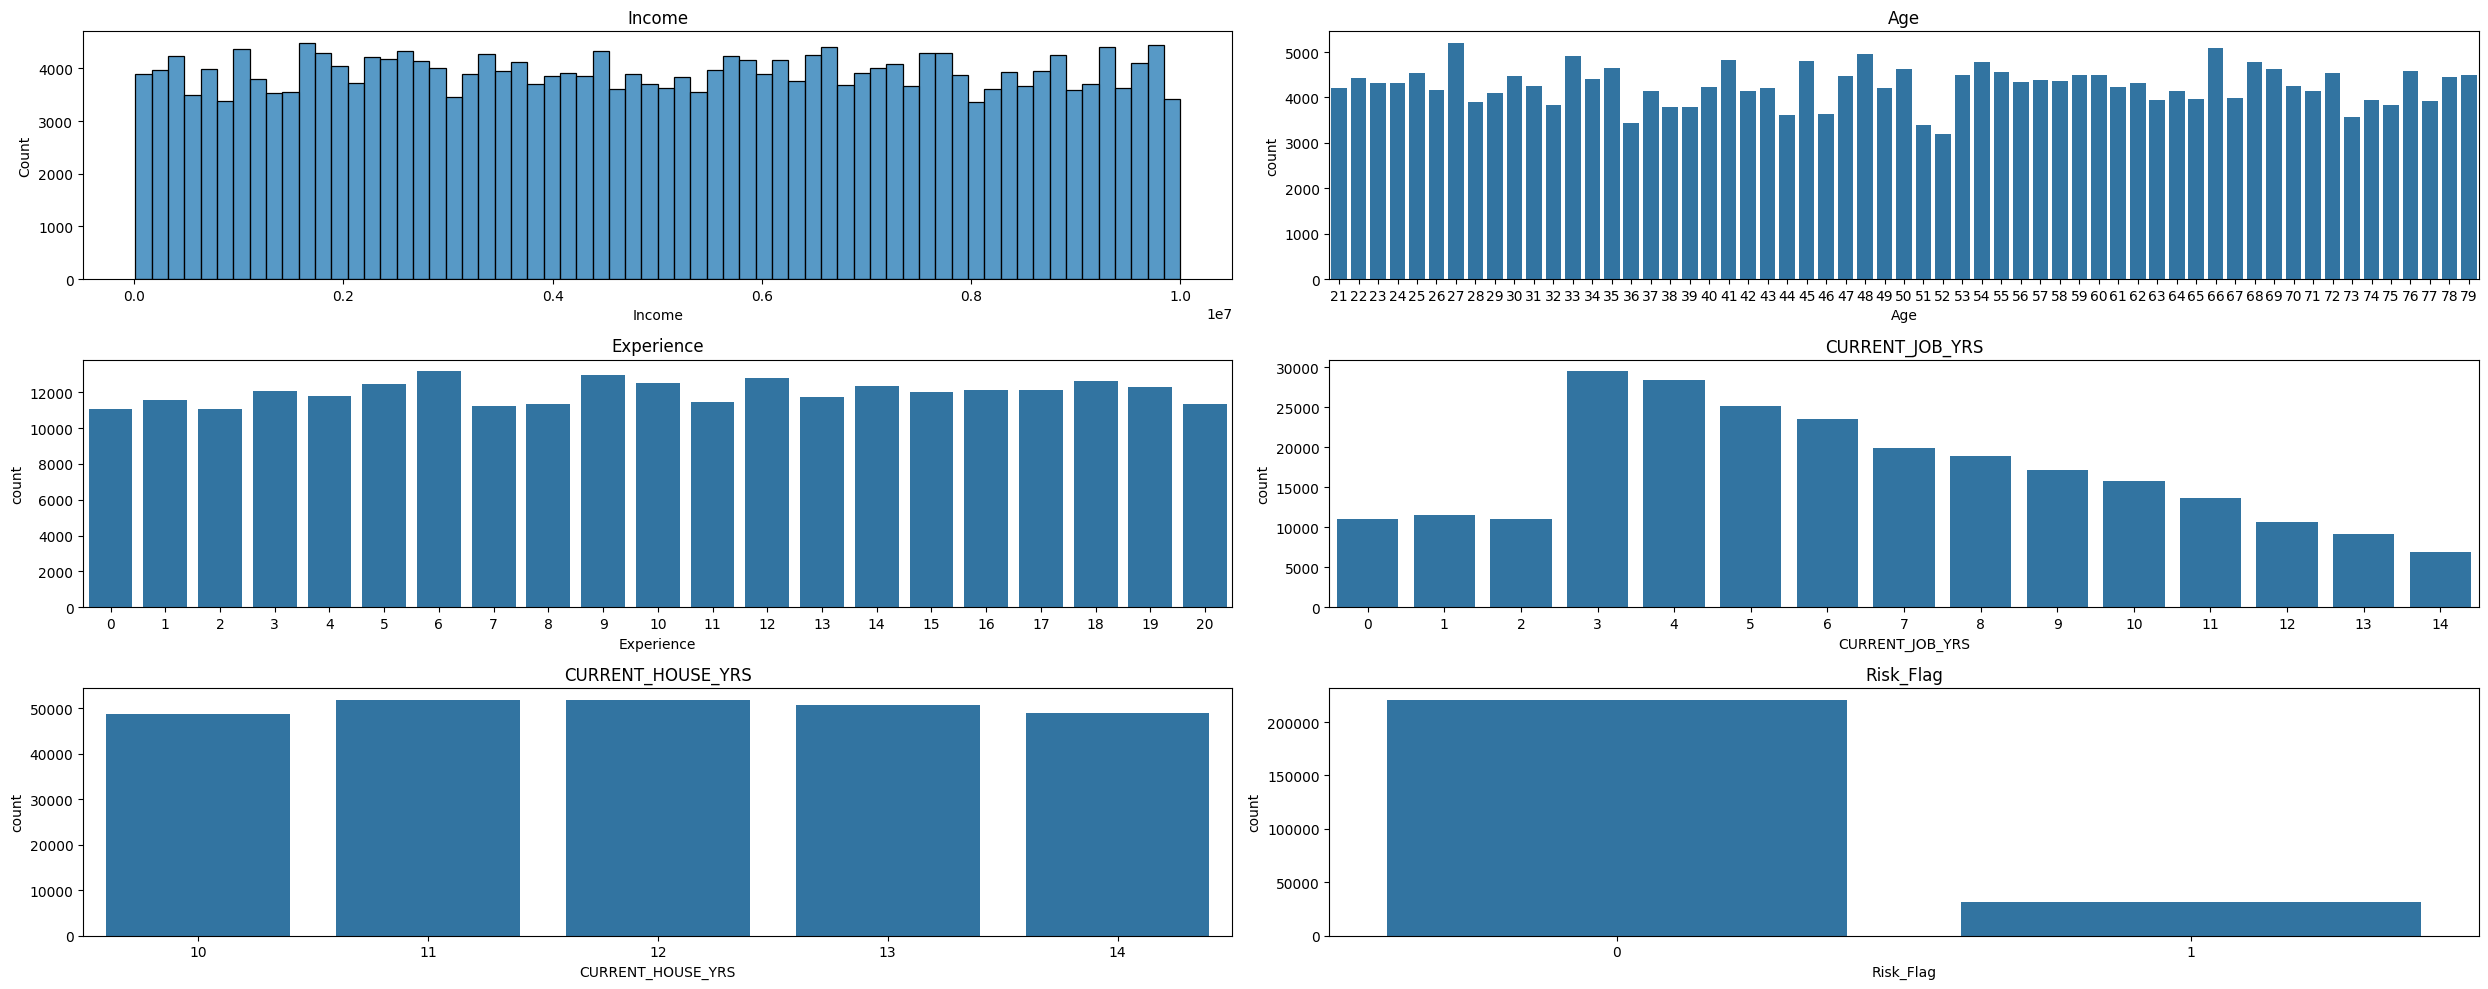

In [11]:
n_rows,n_col = 3,2
thresh = 60
fig,axs = plt.subplots(n_rows,n_col, figsize=(25,10))

for idx,feat in enumerate(num_var.columns):
    if n_rows > 1:
        ax = axs[(idx // n_col), (idx % n_col )]
    else :
        ax = axs[idx]

    if len(data[feat].unique())> thresh :
        sns.histplot(data=data,x=data[feat],ax=ax)

    else :
        sns.countplot(data=data,x= data[feat],ax=ax)
    
    ax.set_title(feat,color="black")

fig.tight_layout()
plt.show()




### NOTE

The Graph above shows the distributionn of the Numerical columns Income, Age, Experience, Current Job Years, Current House Year and Risk Flag. The minimum, maximum, the higest value in each column is also visible enhance the use of hisplot.

Histplot is used for the Numerical columns(Income, Age, Experience, Current Job Years, Current House Year and Risk Flag) to show how the columns are distributed, the maximun,minimum of each ___________ in the dataset.  



#### ****Visualization for Cartegorical Column****  


In [12]:
cat_var.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [13]:
cat_var.nunique()

Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64

In [14]:
# Cartegorizing the categorical variable into discrete and continuous variables.
# discreted_catvar = ["Married/Single","House_Ownership","Car_Ownership"]
# Continuous_catvar = ["Profession","CITY","STATE"]


Continuous_catvar= []
discreted_catvar = []
# for feat in cat_var.columns:

#     if data[feat].nunique() > 5 :
#         Continuous_catvar.append(feat)
#     else :
#         discreted_catvar.append(feat)
# or

for feat in cat_var.columns:

    if len(data[feat].unique()) > 5 :
        Continuous_catvar.append(feat)
    else :
        discreted_catvar.append(feat)

print(Continuous_catvar,discreted_catvar)
print(f"Continuous variable : {Continuous_catvar}")
print(f"Discrete variable : {discreted_catvar}")

['Profession', 'CITY', 'STATE'] ['Married/Single', 'House_Ownership', 'Car_Ownership']
Continuous variable : ['Profession', 'CITY', 'STATE']
Discrete variable : ['Married/Single', 'House_Ownership', 'Car_Ownership']


There Six Categorical Columns in the dataset. The unique values from each columns differs, where City as the highest amount of variables(317) which is to be expected as diffrent states were also used, this Categorical columns are splitted into two Continuous and Discrete. Discrete categorical column have less than 5 unique variables, while Continuous categorical column has 5 unique and above.

In [15]:
cat_var.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [16]:
cat_var[Continuous_catvar].head()

,Profession,CITY,STATE
0,Mechanical_engineer,Rewa,Madhya_Pradesh
1,Software_Developer,Parbhani,Maharashtra
2,Technical_writer,Alappuzha,Kerala
3,Software_Developer,Bhubaneswar,Odisha
4,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


C:\Users\Hp\AppData\Local\Temp\ipykernel_7548\1378976518.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x= data[feat],ax=ax,palette = "Set1")
C:\Users\Hp\AppData\Local\Temp\ipykernel_7548\1378976518.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x= data[feat],ax=ax,palette = "Set1")
C:\Users\Hp\AppData\Local\Temp\ipykernel_7548\1378976518.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x= data[feat],ax=ax,palette = "Set1")


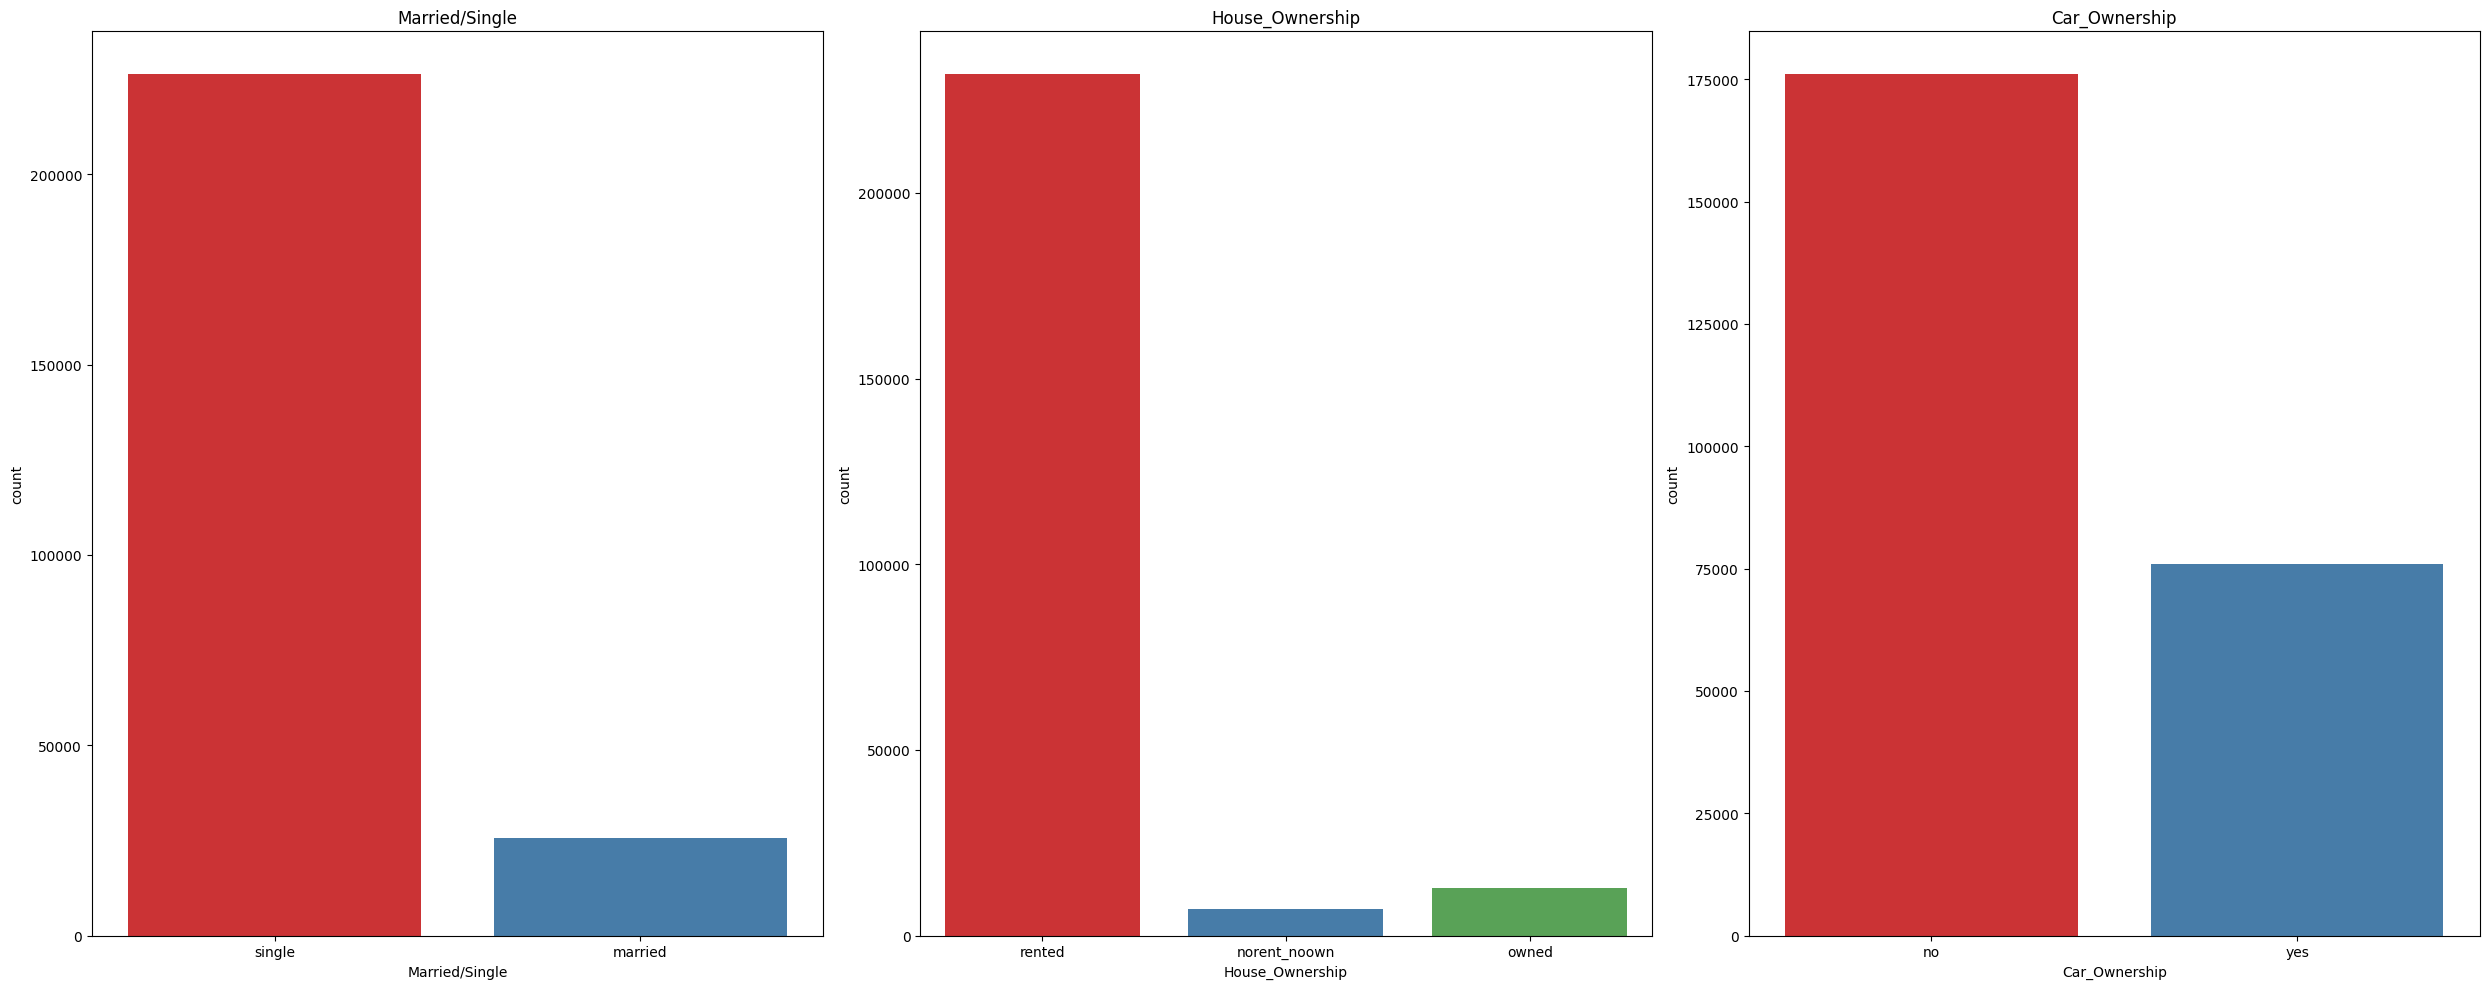

In [17]:
# Visualising discreted column of the categorical variables 

n_rows,n_col = 1,3 # number of row, number of column 

fig,axs = plt.subplots(n_rows,n_col, figsize=(25,10))
# loop to go through the  discrete categorical variable in the data
for idx,feat in enumerate(cat_var[discreted_catvar].columns):
    if n_rows > 1:
        ax = axs[(idx // n_col), (idx % n_col )]
    else :
        ax = axs[idx]

# count plot on categorical variables
    sns.countplot(data=data,x= data[feat],ax=ax,palette = "Set1")
    
    ax.set_title(feat,color="black")

#tight layout
fig.tight_layout()
# show the plot
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7548\2894681443.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x= data[feat],ax=ax,palette = "Set1")
C:\Users\Hp\AppData\Local\Temp\ipykernel_7548\2894681443.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x= data[feat],ax=ax,palette = "Set1")
C:\Users\Hp\AppData\Local\Temp\ipykernel_7548\2894681443.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x= data[feat],ax=ax,palette = "Set1")


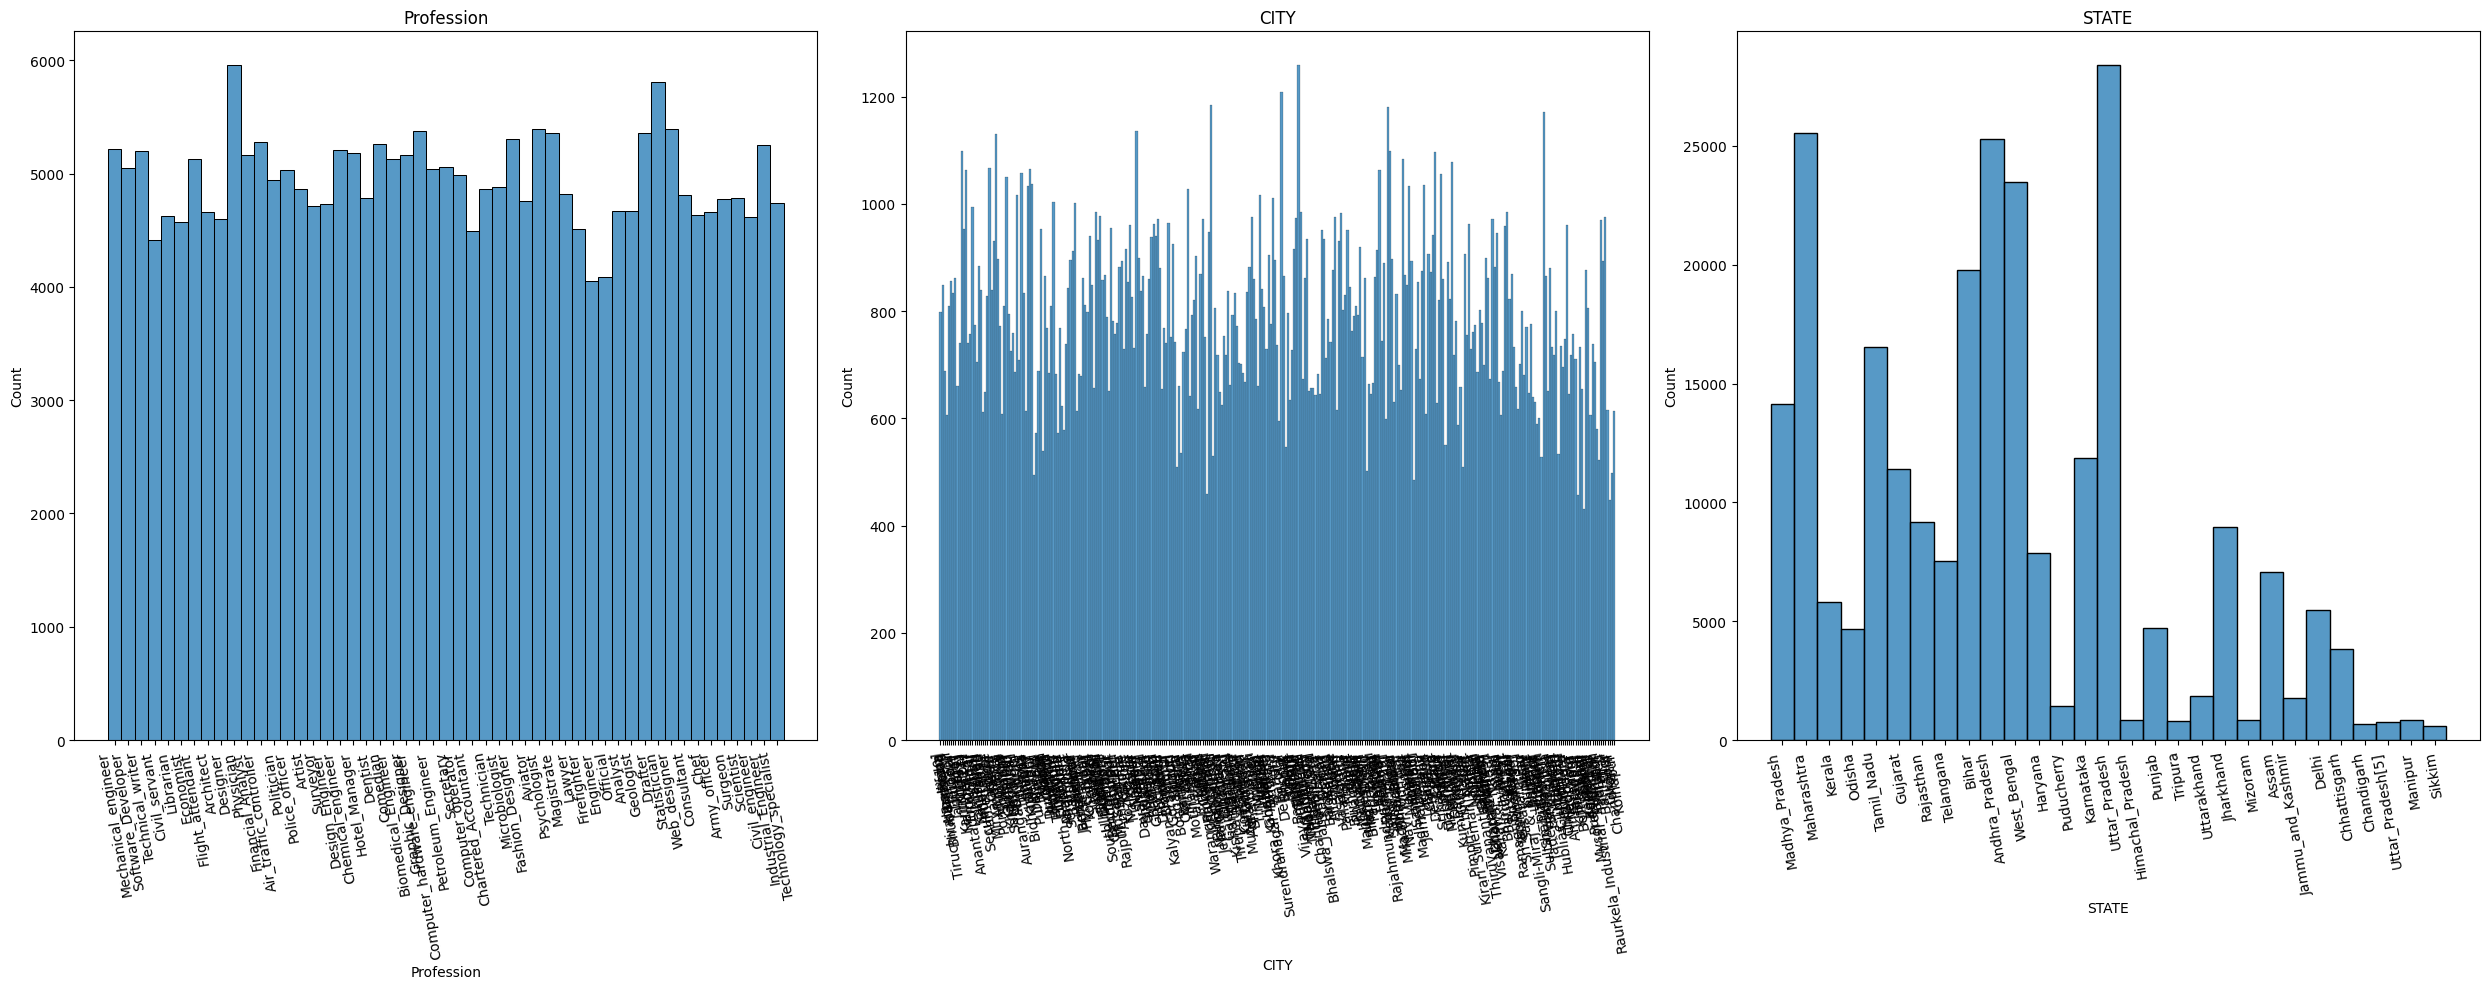

In [18]:
# Visualising the continuous column of the categorical variables 

n_rows,n_col = 1,3 # number of row, number of column 

fig,axs = plt.subplots(n_rows,n_col, figsize=(25,10))
# loop to go through the  discrete categorical variable in the data
for idx,feat in enumerate(cat_var[Continuous_catvar].columns):
    if n_rows > 1:
        ax = axs[(idx // n_col), (idx % n_col )]
    else :
        ax = axs[idx]

# count plot on categorical variables
    sns.histplot(data=data,x= data[feat],ax=ax,palette = "Set1")
    
    ax.set_title(feat,color="black")
    ax.tick_params(axis="x", rotation=100)

#tight layout
fig.tight_layout()
# show the plot
plt.show()


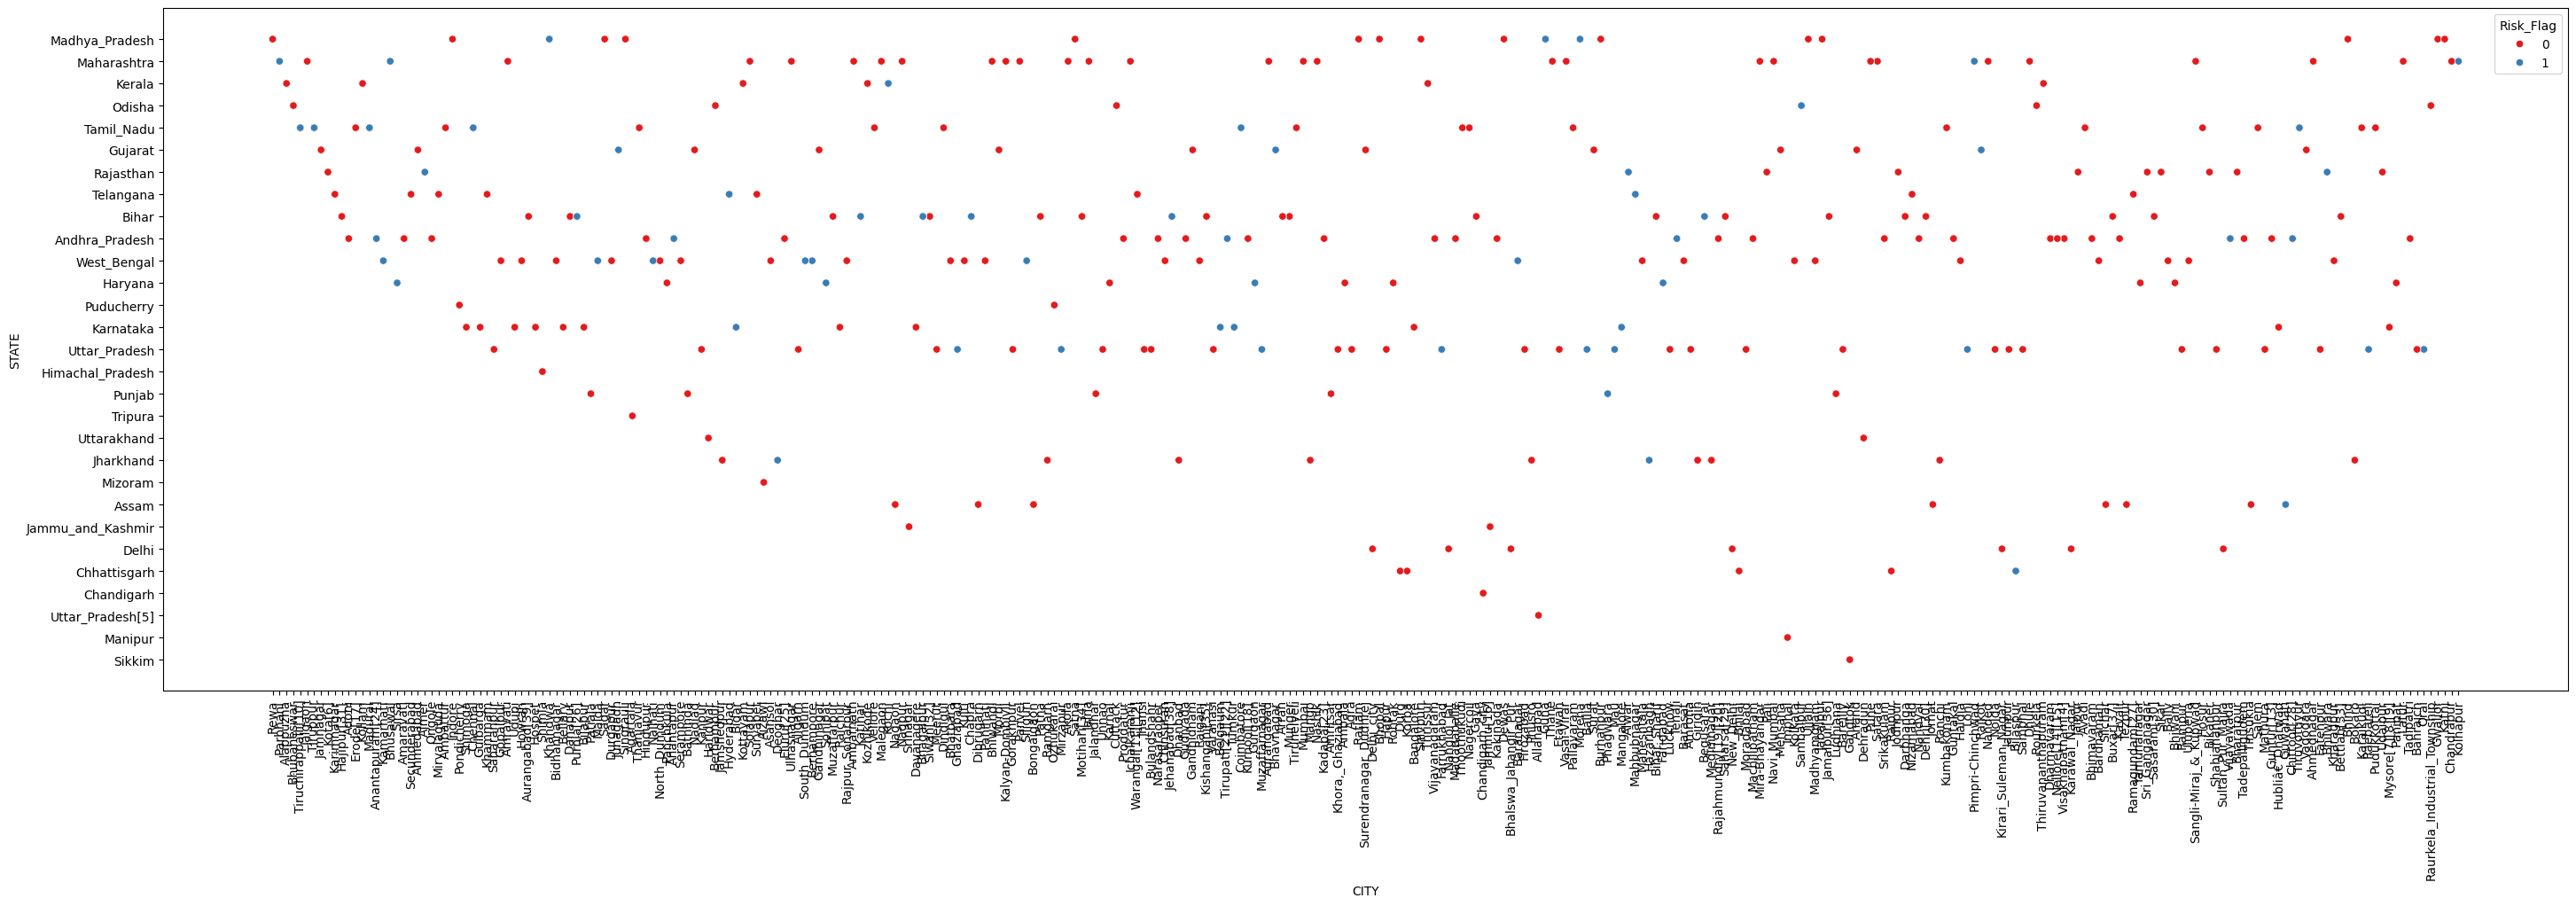

In [19]:
# Visualisation of City against State.
f,ax= plt.subplots(1,1, figsize=(35,10))
sns.scatterplot(x=data['CITY'],y=data['STATE'],palette = "Set1",hue=data["Risk_Flag"])
ax.tick_params(axis="x", rotation=90,)
# show the plot
plt.show()


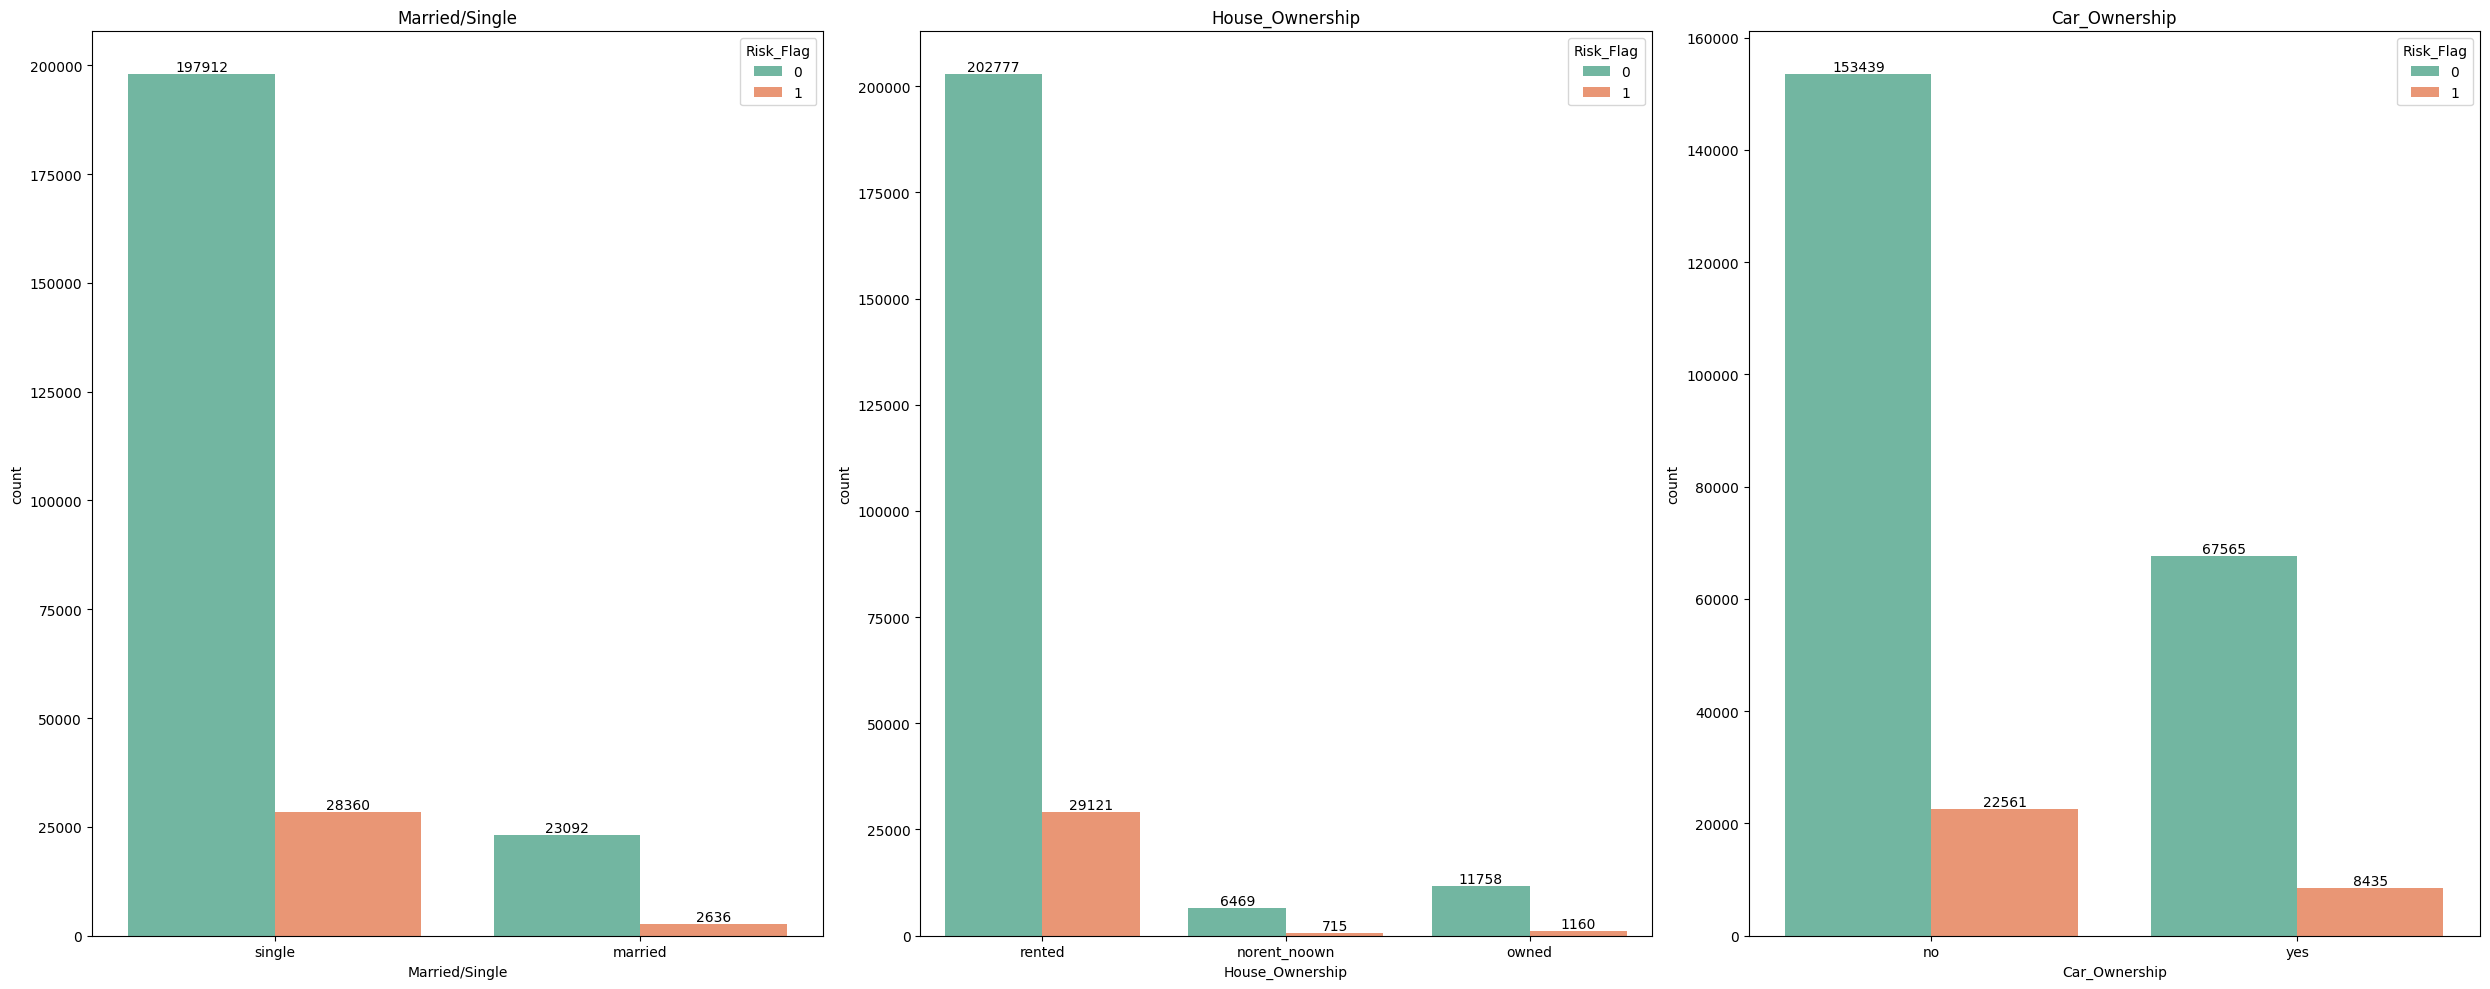

In [20]:
n_rows,n_col = 1,3 # number of row, number of column 

fig,axs = plt.subplots(n_rows,n_col, figsize=(25,10))
# loop to go through the  discrete categorical variable in the data
for idx,feat in enumerate(cat_var[discreted_catvar].columns):
    if n_rows > 1:
        ax = axs[(idx // n_col), (idx % n_col )]
    else :
        ax = axs[idx]


# count plot on categorical variables
    sns.countplot(data=data,x= data[feat],ax=ax,palette = "Set2",hue= "Risk_Flag")
    for container in ax.containers:
        ax.bar_label(container,size=10)
    
    ax.set_title(feat,color="black")

#tight layout
fig.tight_layout()
# show the plot
plt.show()


From the visualisation 
Married/Single - 28360 Single people are Risk flag compared to the 2636 people who are married.

House Ownership - 29121 People who stay in rented house have higer Risk Flag followed by 1160 people who owned their House and 715 people were also Risk Flaged with no rent and appartment.

Car Ownership -   22561 People from those who don't own a car are Risk Flag while 8435 People who own a car are Risk Flag 

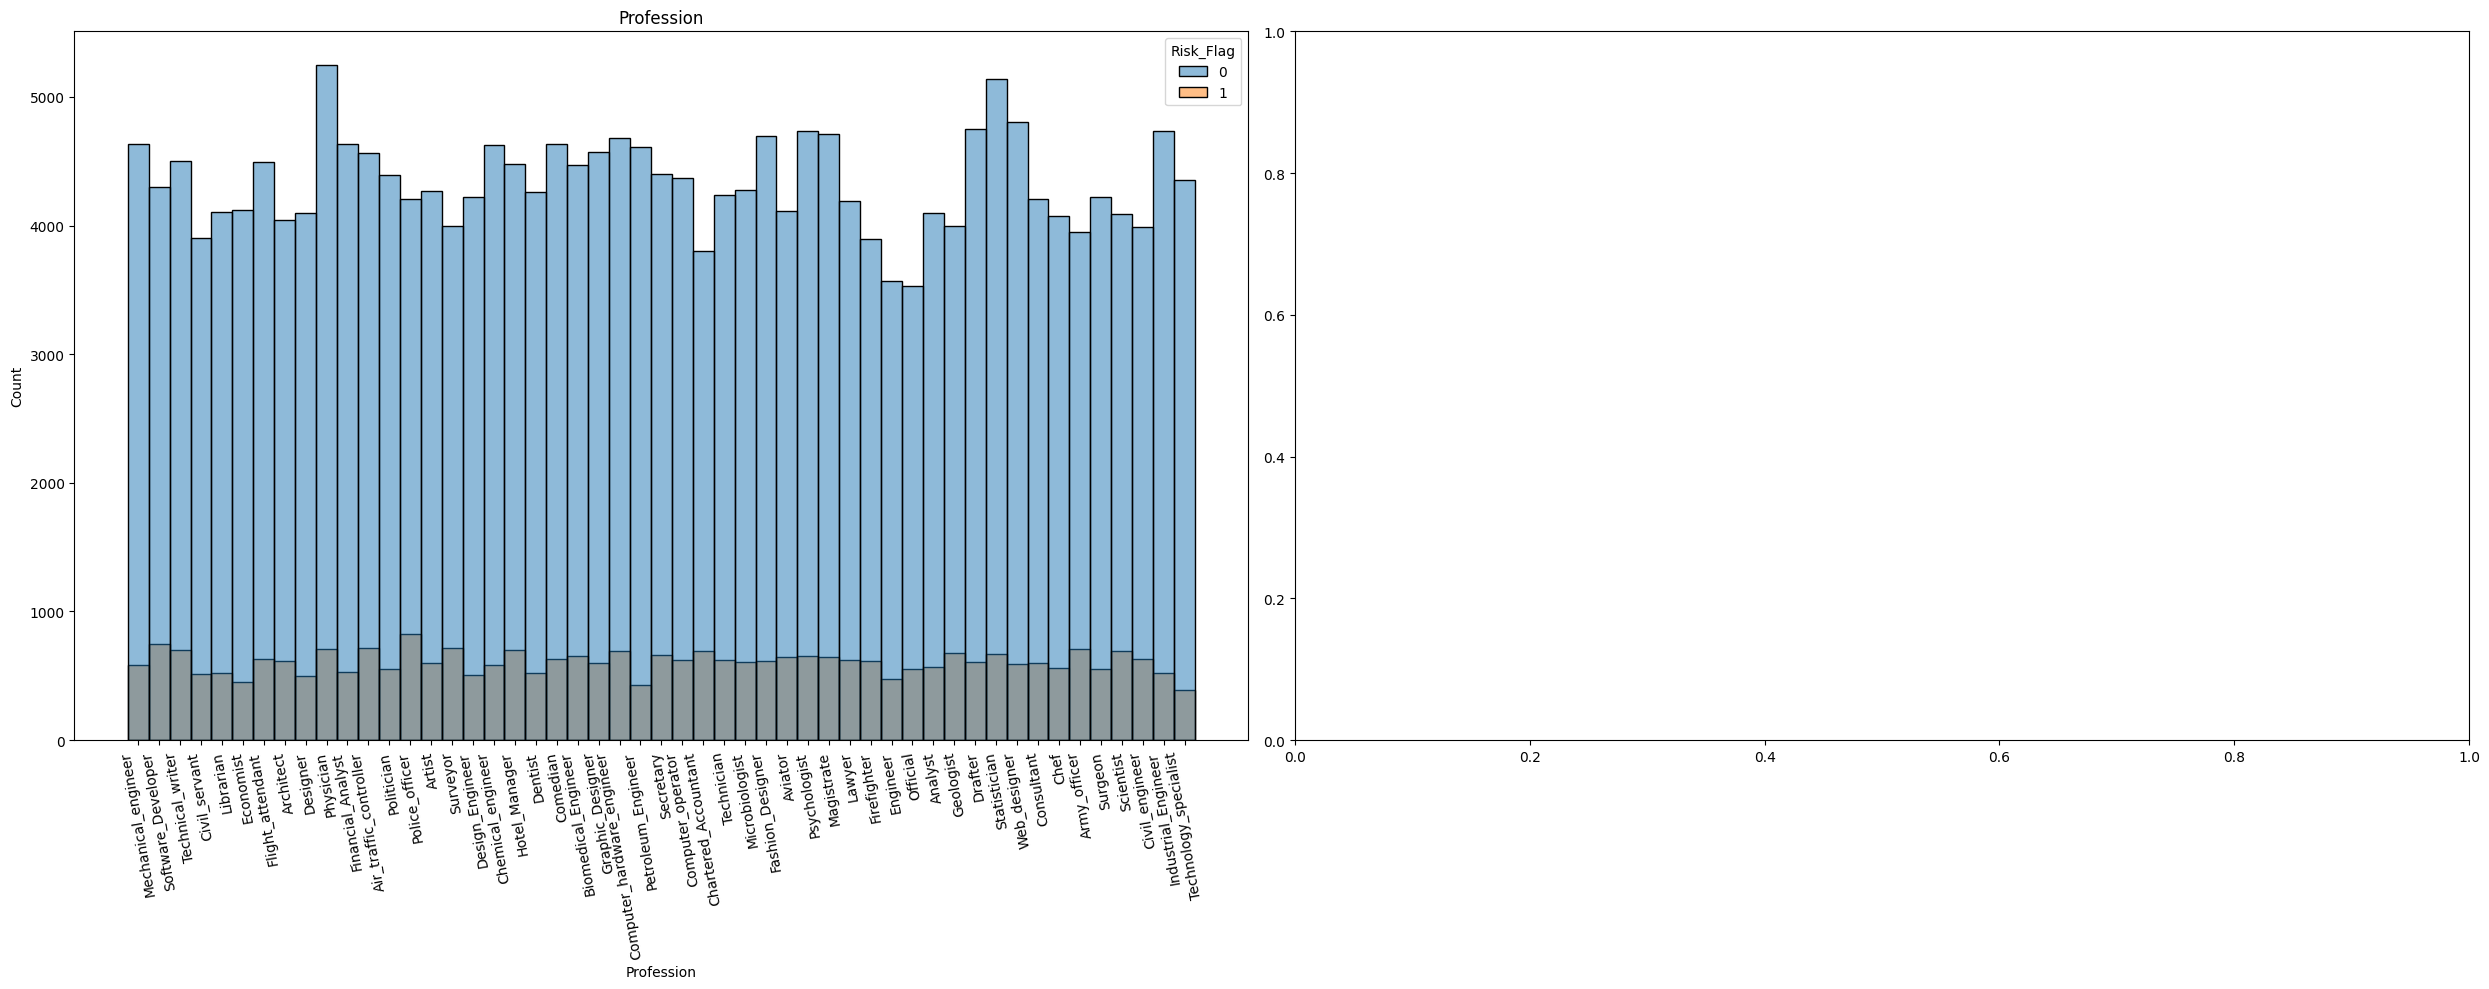

In [21]:
# Visualising the continuous column of the categorical variables 

cat_column = ['Profession','STATE']
n_rows,n_col = 1,2 # number of row, number of column 

fig,axs = plt.subplots(n_rows,n_col, figsize=(25,10))
# loop to go through the  discrete categorical variable in the data
for idx,feat in enumerate(cat_var[cat_column].columns):
    if n_rows > 1:
        ax = axs[(idx // n_col), (idx % n_col )]
    else :
        ax = axs[idx]

# count plot on categorical variables
    sns.histplot(data=data,x= data[feat],ax=ax,hue='Risk_Flag')
    
    ax.set_title(feat,color="black")
    ax.tick_params(axis="x", rotation=100)

    #tight layout
    fig.tight_layout()
    # show the plot
    plt.show()

# Discretization of the continuous Categorical variable 

In [22]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [23]:
data["CITY"].value_counts()

CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64

In [24]:
vim = data[["CITY","STATE"]].groupby("STATE")
vim.head(1)

,CITY,STATE
0,Rewa,Madhya_Pradesh
1,Parbhani,Maharashtra
2,Alappuzha,Kerala
3,Bhubaneswar,Odisha
4,Tiruchirappalli[10],Tamil_Nadu
7,Jamnagar,Gujarat
8,Kota[6],Rajasthan
9,Karimnagar,Telangana
10,Hajipur[31],Bihar
11,Adoni,Andhra_Pradesh


In [25]:
cat_var[Continuous_catvar].head()

,Profession,CITY,STATE
0,Mechanical_engineer,Rewa,Madhya_Pradesh
1,Software_Developer,Parbhani,Maharashtra
2,Technical_writer,Alappuzha,Kerala
3,Software_Developer,Bhubaneswar,Odisha
4,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [26]:
data_2 = data.copy() 
data_2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [27]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Building a supervized learning algorithm 

In [28]:
X = data.drop(labels=['Risk_Flag'],axis=1)
y= data['Risk_Flag']
X.shape,y.shape

((252000, 12), (252000,))

In [29]:
X.drop(labels=['Id'],inplace= True,axis = 1)

In [30]:
from sklearn.model_selection import train_test_split 

In [31]:
cat_alg = X.select_dtypes(include= "O").columns
num_alg = X.select_dtypes(exclude="O").columns
cat_alg.shape,num_alg.shape

((6,), (5,))

### Creating preprocessing pipeline to convert all categorical variable to numerical and scaling the numericals variable. 

In [34]:
ohe = OneHotEncoder()
std = StandardScaler()

preprocessor = ColumnTransformer([
    ("One_hot_Encoder",ohe,cat_alg),
    ("Standard_scaler",std,num_alg)



],remainder= "passthrough")
X= preprocessor.fit_transform(X).toarray()
X

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.18023232e+00, -9.14130833e-01,  7.16355856e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.40667075e-02,  7.31036347e-01,  7.16355856e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.01363724e+00, -6.39936303e-01, -1.42798056e+00],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -5.13851972e-01,  1.82647287e-01,  1.57705165e-03],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.68001759e+00, -1.73671442e+00, -1.42798056e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.15209891e+00,  1.82647287e-01, -7.13201753e-01]])

#### Splitting the data to train and test 

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=111,test_size= 0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((201600, 409), (50400, 409), (201600,), (50400,))

## Function to evalute the outcome of the  metrics algorithms 


In [36]:

def Evaluate_func(true_val,predictied_val) :
    """
    This takes in true value and predicted value as argument and returns various metrics errors 
    """
    # Confusion metrics
    con_mx= confusion_matrix(true_val,predictied_val)
    true_neg,false_pos,false_neg,true_pos = con_mx.ravel()
    # Accuracy metrics
    acc_score = accuracy_score(true_val,predictied_val)
    # Precision metrics
    prec_score =precision_score(true_val,predictied_val,zero_division=1)
    # Recall Score
    recal_score = recall_score(true_val,predictied_val,zero_division=1)
    F1_score = f1_score(true_val,predictied_val,zero_division=1)
    # fpr,tpr,thresholds = roc_curve(true_val, predictied_val)
    roc_auc = roc_auc_score(true_val, predictied_val)
    return con_mx,true_neg,false_pos,false_neg,true_pos,acc_score,prec_score,recal_score,F1_score, roc_auc



In [38]:

models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVM":SVC(),
    "KNeighbors Classifier" : KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}
model_list = []

for i in range(len(list(models))):
    # instantiaing 
    model = list(models.values())[i]
    # To train using the model
    model.fit(X_train,y_train)
    # Predicting the outcome 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and test data using Evaluate func 
    
    train_con_mx,train_true_neg,train_false_pos,train_false_neg,train_true_pos,train_acc_score,train_prec_score,train_recal_score,train_F1_score,train_roc_auc = Evaluate_func(y_train,y_train_pred)

    test_con_mx,test_true_neg,test_false_pos,test_false_neg,test_true_pos,test_acc_score,test_prec_score,test_recal_score,test_F1_score,test_roc_auc = Evaluate_func(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print ("- Confusion metrics Error :\n",train_con_mx)
    print("- Accuracy metrics : {:.4f}".format(train_acc_score))
    print("- Precision score metrics : {:.4f}".format(train_prec_score))
    print("- Recall score {:.4f}".format(train_recal_score))
    print("- F1 Score {:.4f}".format(train_F1_score))

    print("-" * 60) 
    print("Model performance for Testset")
    print ("- Confusion metrics Error :".format(test_con_mx))
    print("- Accuracy metrics : {:.4f}".format(test_acc_score))
    print("- Precision score metrics : {:.4f}".format(test_prec_score))
    print("- Recall score {:.4f}".format(test_recal_score))
    print("- F1 Score {:.4f}".format(test_F1_score))

    print('=' * 60)
    print('\n')




Logistic Regression
Model Performance for Training set
- Confusion metrics Error :
 [[176861      0]
 [ 24739      0]]
- Accuracy metrics : 0.8773
- Precision score metrics : 1.0000
- Recall score 0.0000
- F1 Score 0.0000
------------------------------------------------------------
Model performance for Testset
- Confusion metrics Error :
- Accuracy metrics : 0.8759
- Precision score metrics : 1.0000
- Recall score 0.0000
- F1 Score 0.0000


Decision Tree Classifier
Model Performance for Training set
- Confusion metrics Error :
 [[169355   7506]
 [  5279  19460]]
- Accuracy metrics : 0.9366
- Precision score metrics : 0.7216
- Recall score 0.7866
- F1 Score 0.7527
------------------------------------------------------------
Model performance for Testset
- Confusion metrics Error :
- Accuracy metrics : 0.8844
- Precision score metrics : 0.5332
- Recall score 0.5560
- F1 Score 0.5444


Random Forest Classifier
Model Performance for Training set
- Confusion metrics Error :
 [[168967   789

# RESULT 
Revealuating our models with Confusion metrics, Accuracy metrics, Precision score metrics,Recall and F1 score.

*  The Logistic model predicted only one class (negatives) from the confusion metrics meaning, it didn't predict any positives resulting to poor F1-score and Recall score been 0.
* The Random Forest Classifier performed better than the other classifiers although performance drops from Training to Test set in Accuracy,Precision, Recall and F1 scores. Random forest classifier provided a balanced result and generally performs better than other.
* This data still needs more futher hyper-parameter tuning, feature engineering to select better features without overfitting or underfitting the dataset.


# Futher Fearure Engineering
## Improving the dataset 

In [39]:
data_2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


* Checking for outlier and balancing of the dataset.

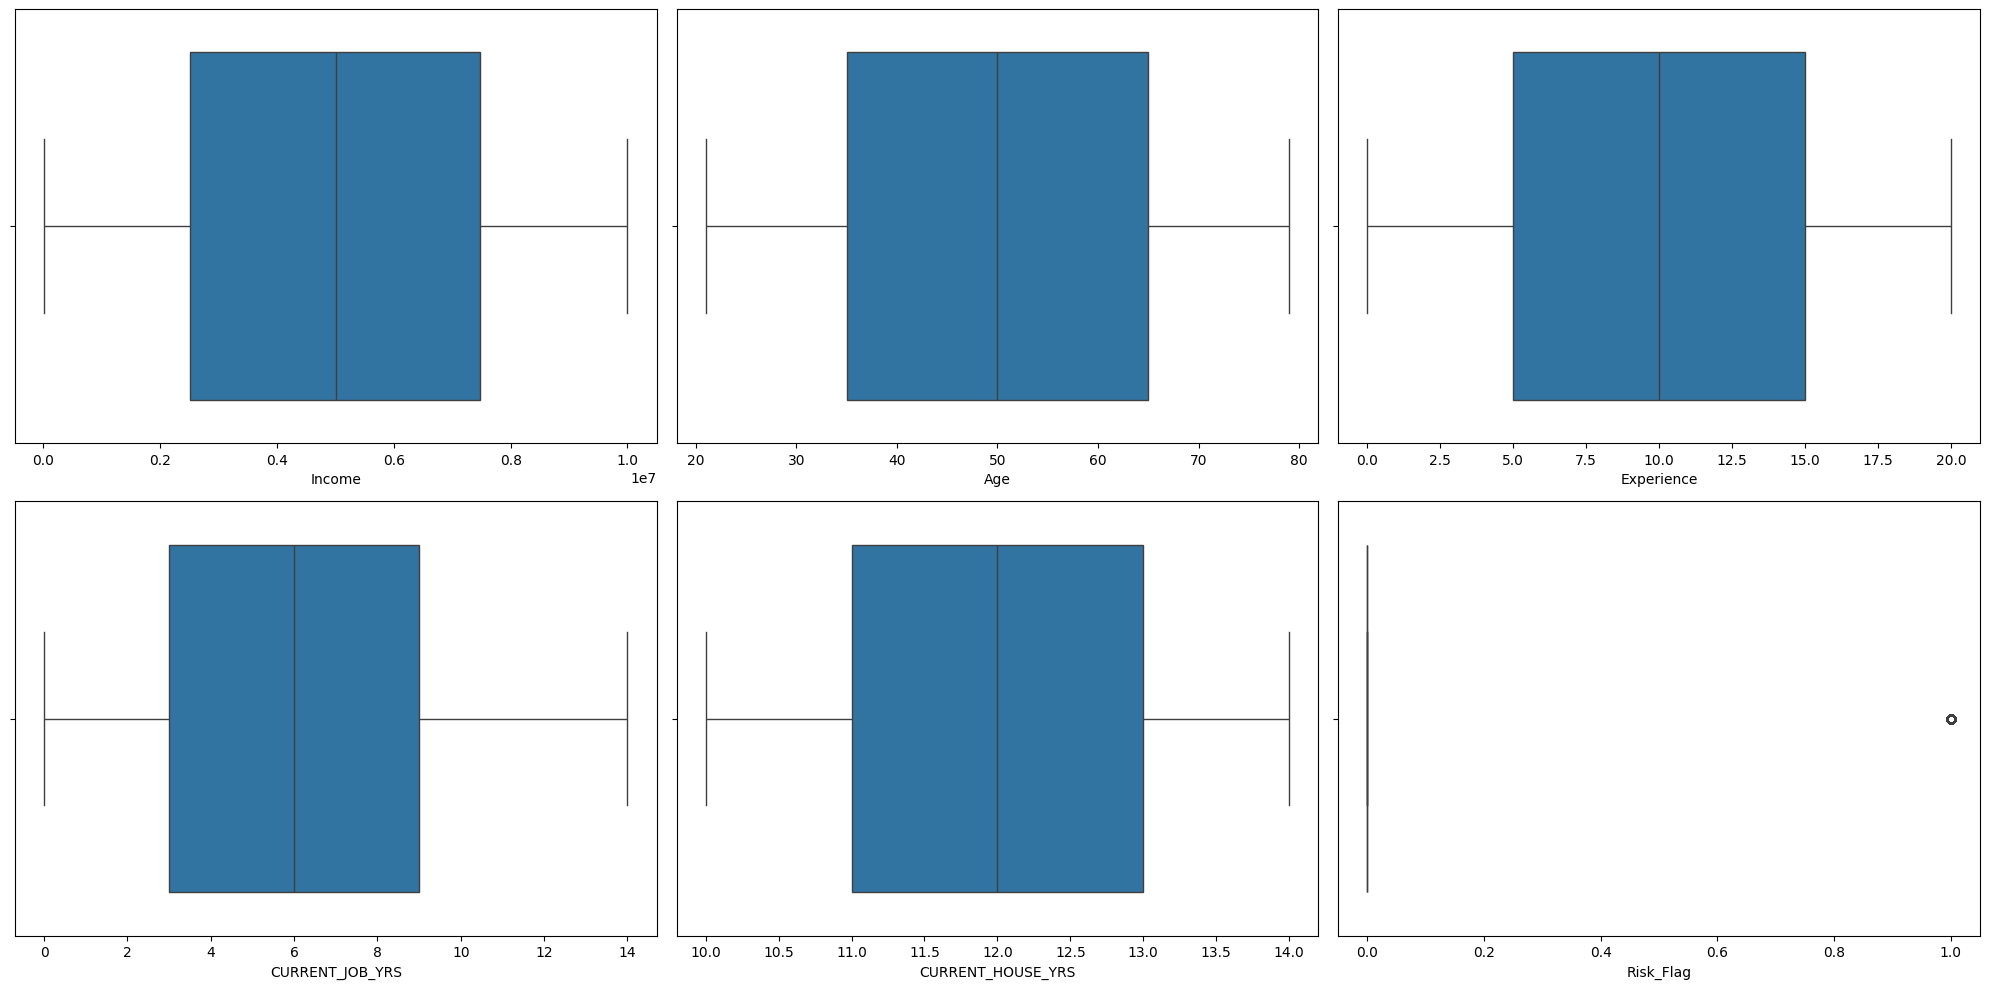

In [41]:
n_row, n_col = 2,3
fig,axs=plt.subplots(n_row,n_col,figsize=(20,10))
for idx,feat in enumerate(num_var.columns ):
    if n_row > 1:
        ax = axs[(idx//n_col),(idx % n_col)]
    else :
        ax =axs[idx]
    
    sns.boxplot(data=data,x=feat, ax =ax)
    #tight layout
fig.tight_layout()
# show the plot
plt.show()

From the boxplot above the numerical variable has no visible outlier, well distributed having the minimum, average and maximum except Risk Flag. Risk flag is grouped into 0 and 1. There are (221,004) 0's and (30,996) 1's. Overall numerical data looks balanced.

In [42]:
data_2["CURRENT_JOB_YRS"].value_counts()

CURRENT_JOB_YRS
3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: count, dtype: int64

In [43]:
data["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

* Normalising/ discretizing features from the dataset

In [44]:
#normalising
data_2["Risk_Flag"].value_counts(normalize= True).mul(100)

Risk_Flag
0    87.7
1    12.3
Name: proportion, dtype: float64

In [46]:
feature = "CURRENT_JOB_YRS"
labels = ["<4","5-9",">10"]
data_2[feature] = pd.qcut(x=data[feature],q=3,labels=labels,duplicates= "raise")
data_2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,<4,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,>10,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,<4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,<4,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,<4,14,1


In [47]:
feature = "Age"
label = ["21-30","31-40","41-50","51-60","61-70","71-80"]
data_2[feature]= pd.qcut(x=data_2[feature],labels=label,q=6,duplicates= "raise")
data_2[feature].value_counts()

Age
21-30    43657
41-50    43499
51-60    42540
71-80    41747
31-40    41492
61-70    39065
Name: count, dtype: int64

In [48]:
def state_column (feature:str):
    feat = feature

    # If and elif statement to change features in state
    if feat == "Uttar_Pradesh":
        return "Uttar_Pradesh"
    elif feat == "Maharashtra":
        return "Maharashtra"
    elif feat == "Andhra_Pradesh":
        return "Andhra_Pradesh"
    elif feat == "West_Bengal":
        return "West_Bengal"
    else :
        return "Others"
    

data_2["STATE"]=data_2["STATE"].apply(state_column)
data_2["STATE"].value_counts()

STATE
Others            149258
Uttar_Pradesh      28400
Maharashtra        25562
Andhra_Pradesh     25297
West_Bengal        23483
Name: count, dtype: int64

In [50]:

data_2.drop(columns=["Id","CITY","Profession"],axis=1,inplace= True)
data_2

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,21-30,3,single,rented,no,Others,<4,13,0
1,7574516,31-40,10,single,rented,no,Maharashtra,>10,13,0
2,3991815,61-70,4,married,rented,no,Others,<4,10,0
3,6256451,41-50,2,single,rented,yes,Others,<4,12,1
4,5768871,41-50,11,single,rented,no,Others,<4,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,41-50,13,single,rented,no,West_Bengal,5-9,11,0
251996,2843572,21-30,10,single,rented,no,Others,5-9,11,0
251997,4522448,41-50,7,single,rented,no,Maharashtra,5-9,12,0
251998,6507128,41-50,0,single,rented,no,Others,<4,10,0


In [51]:

label_encoder = LabelEncoder()
Oridinal_encoder = OrdinalEncoder()

X_clean = data_2.drop(labels=['Risk_Flag'],axis=1)
y_clean = data_2['Risk_Flag']

col_ohe = ["Married/Single","House_Ownership","STATE"]
col_ord = ["Age","CURRENT_JOB_YRS","Car_Ownership"]
col_stand= ['Income',"Experience","CURRENT_HOUSE_YRS"]


label

preprocessor_clean = ColumnTransformer([
    ("One_hot_Encoder",ohe,col_ohe),
    ("label_encoder",Oridinal_encoder,col_ord),
    ("Standard_scaler",std,col_stand)



],remainder= "passthrough")

X_clean= preprocessor_clean.fit_transform(X_clean)
X_clean

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.28314486e+00, -1.18023232e+00,  7.16355856e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         8.95457244e-01, -1.40667075e-02,  7.16355856e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.49268601e-01, -1.01363724e+00, -1.42798056e+00],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.64912549e-01, -5.13851972e-01,  1.57705165e-03],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         5.24618196e-01, -1.68001759e+00, -1.42798056e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.41510816e+00,  1.15209891e+00, -7.13201753e-01]])

* Using cross validation to choose the right models 


In [52]:
Xclean_train,Xclean_test,yclean_train,yclean_test=train_test_split(X_clean,y_clean,random_state=111,test_size=0.2)
Xclean_train.shape,Xclean_test.shape,yclean_train.shape,yclean_test.shape

((201600, 16), (50400, 16), (201600,), (50400,))

In [53]:
mod=RandomForestClassifier()
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVM": SVC(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}
k = 5 
skf = StratifiedKFold(n_splits=k,random_state=111,shuffle=True)
for name,model in models.items():
    scores_1 = cross_val_score(model,X_clean,y_clean,cv=skf)

    print(f'Model : {name}')
    print(f'Cross-valdation Score : {scores_1}')
    print(f'Mean Accuracy : {scores_1.mean()}')
    print(f'Standard Deviation: {scores_1.std()}')
    print('-' * 80)
    print('\n')


Model : Logistic Regression
Cross-valdation Score : [0.87702381 0.87702381 0.87702381 0.87702381 0.87698413 0.87698413
 0.87698413 0.87698413 0.87698413 0.87698413]
Mean Accuracy : 0.877
Standard Deviation: 1.944039478400429e-05
--------------------------------------------------------------------------------


Model : Random Forest Classifier
Cross-valdation Score : [0.89694444 0.89563492 0.89087302 0.89349206 0.89396825 0.89539683
 0.89388889 0.89357143 0.8940873  0.89638889]
Mean Accuracy : 0.8944246031746033
Standard Deviation: 0.0016564549216725977
--------------------------------------------------------------------------------


Model : SVM
Cross-valdation Score : [0.87702381 0.87702381 0.87702381 0.87702381 0.87698413 0.87698413
 0.87698413 0.87698413 0.87698413 0.87698413]
Mean Accuracy : 0.877
Standard Deviation: 1.944039478400429e-05
--------------------------------------------------------------------------------


Model : KNeighbors Classifier
Cross-valdation Score : [0.89333

### From the crossvalidation model shows that Random Forest Classifier has the highest mean Accuracy followed by KNeighbors Classifier, although  Logistic Regression's standard deviation is 0.0 meaining it to be very consistent across fold but has a low Mean Accuracy, the standard deviation of the Random Forest Classifier is also low showing that the model is consistent and it would do well with unseen data. Random Forest Classifier is used as it produced a higher Mean Accuracy and a very low Standard Deviation.

In [54]:

param_grid = {"n_estimators" : [50,100,200],
    "max_depth": [None,10,20,30],
    "min_samples_split" : [2,5,10]
}
model_to_use = RandomForestClassifier()
grid_search = GridSearchCV(estimator= model_to_use,param_grid = param_grid,cv=5,scoring = "accuracy")
grid_search.fit(X_clean,y_clean)
best_params =grid_search.best_estimator_
print(f'Best Model : {best_params}')

best_model = grid_search.best_estimator_
print(f"Best Model : {best_model}")

test_score_clean = best_model.score(Xclean_test,yclean_test)
print(f'Test Accuracy : {test_score_clean}')

Best Model : RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=200)
Best Model : RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=200)
Test Accuracy : 0.9246031746031746


## This result of the Grid Search_Cv shows the best Random Forest Classifier Model with estimator to be used in order to produced an Accuracy of at least 93% from unseen data(test).

### Confusion Matrix to evaluate the performance the model. ROC curve and AUC to evaluate model's discriminatory power.  

In [55]:

yclean_pred = best_model.predict(Xclean_test)
print(confusion_matrix(yclean_test,yclean_pred))
print(classification_report(yclean_test,yclean_pred))


[[42296  1847]
 [ 1953  4304]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     44143
           1       0.70      0.69      0.69      6257

    accuracy                           0.92     50400
   macro avg       0.83      0.82      0.83     50400
weighted avg       0.92      0.92      0.92     50400



In [1]:
# Prediction Result 
yclean_pred_prob = best_model.predict_proba(Xclean_test)[:,1]

fpr,tpr,thresholds = roc_curve(yclean_test,yclean_pred_prob)
auc = roc_auc_score(yclean_test,yclean_pred_prob)

print(f'AUC: {auc}')

plt.figure()
plt.plot(fpr,tpr,lw =2, color = "darkorange " ,label= " ROC Curve(area = %0.2f)" %auc )
plt.plot([0,1],[0,1],color = 'navy',lw=2,linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


NameError: name 'best_model' is not defined

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [57]:
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest Classifier": RandomForestClassifier(),
#      "SVC": SVC(),
#     # "KNeighbors Classifier": KNeighborsClassifier(),
#     # "Naive Bayes": GaussianNB(),
# }
# k = 10 
# skf = StratifiedKFold(n_splits=k,random_state=111,shuffle=True)
# for name,model in models.items():
#     scores_1 = cross_val_score(model,X_clean,y_clean,cv=skf)

#     print(f'Model : {name}')
#     # print(f'Cross-valdation Score : {scores_1}')
#     # print(f'Mean Accuracy : {scores_1.mean()}')
#     # print(f'Standard Deviation: {scores_1.std()}')
#     # print('-' * 60)
#     # print('\n')


In [58]:
# from sklearn import svm
# from sklearn.model_selection import cross_validate,cross_val_score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier

# # clss = svm.SVC(kernel="linear", C=1,random_state=111)
# # scores = cross_val_score(clss,X_clean,y_clean,cv=5,scoring = models) 
# mod=RandomForestClassifier()
# # models = {
# #     "Logistic Regression": LogisticRegression(),
# #     "Random Forest Classifier": RandomForestClassifier(),
# #     # "SVC": SVC(),
# #     "KNeighbors Classifier": KNeighborsClassifier(),
# #     "Naive Bayes": GaussianNB(),
# # }
# k= 5
# skf = StratifiedKFold(n_splits=k,random_state=111,shuffle=True)
# scores = cross_val_score(mod,X_clean,y_clean,cv=skf)


# print(f'Cross-valdation Score : {scores}')
# print(f'Mean Accuracy : {scores.mean()}')
# print(f'Standard Deviation: {scores.std()}')

In [59]:
# from sklearn import svm
# from sklearn.model_selection import cross_validate,cross_val_score

# clss = svm.SVC(kernel="linear", C=1,random_state=111)
# scores = cross_val_score(clss,X_clean,y_clean,cv=5,scoring = 'precision_micro') 


# cross = cross_validate()

In [60]:

# model_list = []

# for name, model in models.items():
#     # Train the model
#     model.fit(Xclean_train, yclean_train)
    
#     # Predict outcomes
#     yclean_train_pred = model.predict(Xclean_train)
#     yclean_test_pred = model.predict(Xclean_test)
    
#     # Evaluate Train and Test data using Evaluate_func
#     trainclean_con_mx, trainclean_true_neg, trainclean_false_pos, trainclean_false_neg, trainclean_true_pos, trainclean_acc_score, trainclean_prec_score, trainclean_recal_score, trainclean_F1_score, trainclean_roc_auc = Evaluate_func(yclean_train, yclean_train_pred)
#     testclean_con_mx, testclean_true_neg, testclean_false_pos, testclean_false_neg, testclean_true_pos, testclean_acc_score, testclean_prec_score, testclean_recal_score, testclean_F1_score, testclean_roc_auc = Evaluate_func(yclean_test, yclean_test_pred)
    
#     print(name)
#     model_list.append(name)

#     print("Model Performance for Training set")
#     print(f"- Confusion Matrix:\n{trainclean_con_mx}")
#     print(f"- Accuracy: {trainclean_acc_score:.4f}")
#     print(f"- Precision: {trainclean_prec_score:.4f}")
#     print(f"- Recall: {trainclean_recal_score:.4f}")
#     print(f"- F1 Score: {trainclean_F1_score:.4f}")
#     print(f"- ROC AUC: {trainclean_roc_auc:.4f}")
    
#     print("-" * 70)

#     print("Model Performance for Test set")
#     print(f"- Confusion Matrix:\n{testclean_con_mx}")
#     print(f"- Accuracy: {testclean_acc_score:.4f}")
#     print(f"- Precision: {testclean_prec_score:.4f}")
#     print(f"- Recall: {testclean_recal_score:.4f}")
#     print(f"- F1 Score: {testclean_F1_score:.4f}")
#     print(f"- ROC AUC: {testclean_roc_auc:.4f}")
    
#     print("=" * 70)
#     print('\n')